# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

# The Spark Foundation

## Task4:-Exploratory Data Analysis - Terrorism (Level - Intermediate)

## Author: Aditya Negi


# Importing All the Required Libraries for this Task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("GT.csv" , encoding = 'latin1')
print("Data is successfully imported")

Data is successfully imported


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
data.shape

(181691, 135)

In [5]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Data Cleaning 

In [7]:
data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country','provstate':'State',
                     'city':'City','latitude':'Latitude', 'longitude': 'Longitude', 'attacktype1_txt': 'AttackType',
                     'targtype1_txt':'TargetType', 'weaptype1_txt':'Weapon', 'nkill':'Killed', 'nwound':'Wounded',
                     'gname':'Group', 'motive':'Motive', 'region_txt':'Region'}, inplace=True)


In [8]:
data = data[['Year', 'Month', 'Day', 'Country', 'State', 'City', 'Latitude', 'Longitude','AttackType', 'TargetType', 'Weapon', 'Killed', 'Wounded', 'Group', 'Motive', 'Region']]

In [9]:
data.head().T

,0,1,2,3,4
Year,1970,1970,1970,1970,1970
Month,7,0,1,1,1
Day,2,0,0,0,0
Country,Dominican Republic,Mexico,Philippines,Greece,Japan
State,NaN,Federal,Tarlac,Attica,Fukouka
City,Santo Domingo,Mexico city,Unknown,Athens,Fukouka
Latitude,18.456792,19.371887,15.478598,37.99749,33.580412
Longitude,-69.951164,-99.086624,120.599741,23.762728,130.396361
AttackType,Assassination,Hostage Taking (Kidnapping),Assassination,Bombing/Explosion,Facility/Infrastructure Attack
TargetType,Private Citizens & Property,Government (Diplomatic),Journalists & Media,Government (Diplomatic),Government (Diplomatic)


In [10]:
data.shape

(181691, 16)

In [11]:
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
City             435
Latitude        4556
Longitude       4557
AttackType         0
TargetType         0
Weapon             0
Killed         10313
Wounded        16311
Group              0
Motive        131130
Region             0
dtype: int64

In [12]:
# Fixing the Null value of Killed and Wounded 
data['Wounded'] = data['Wounded'].fillna(0)
data['Killed'] = data['Killed'].fillna(0)

In [13]:
# Add Wounded and Killed to find total No of Casualities
data['Casualities'] = data['Killed'] + data['Wounded']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   City         181256 non-null  object 
 6   Latitude     177135 non-null  float64
 7   Longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   TargetType   181691 non-null  object 
 10  Weapon       181691 non-null  object 
 11  Killed       181691 non-null  float64
 12  Wounded      181691 non-null  float64
 13  Group        181691 non-null  object 
 14  Motive       50561 non-null   object 
 15  Region       181691 non-null  object 
 16  Casualities  181691 non-null  float64
dtypes: float64(5), int64(3), object(9)
memory usage: 23.6+ MB


In [15]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


## Data Visualization

In [16]:
year_counts = data['Year'].value_counts(dropna=False).sort_index()[: :2]
print(year_counts)

Year
1970      651
1972      568
1974      581
1976      923
1978     1526
1980     2662
1982     2544
1984     3495
1986     2860
1988     3721
1990     3887
1992     5071
1995     3081
1997     3197
1999     1395
2001     1906
2003     1278
2005     2017
2007     3242
2009     4721
2011     5076
2013    12036
2015    14965
2017    10900
Name: count, dtype: int64


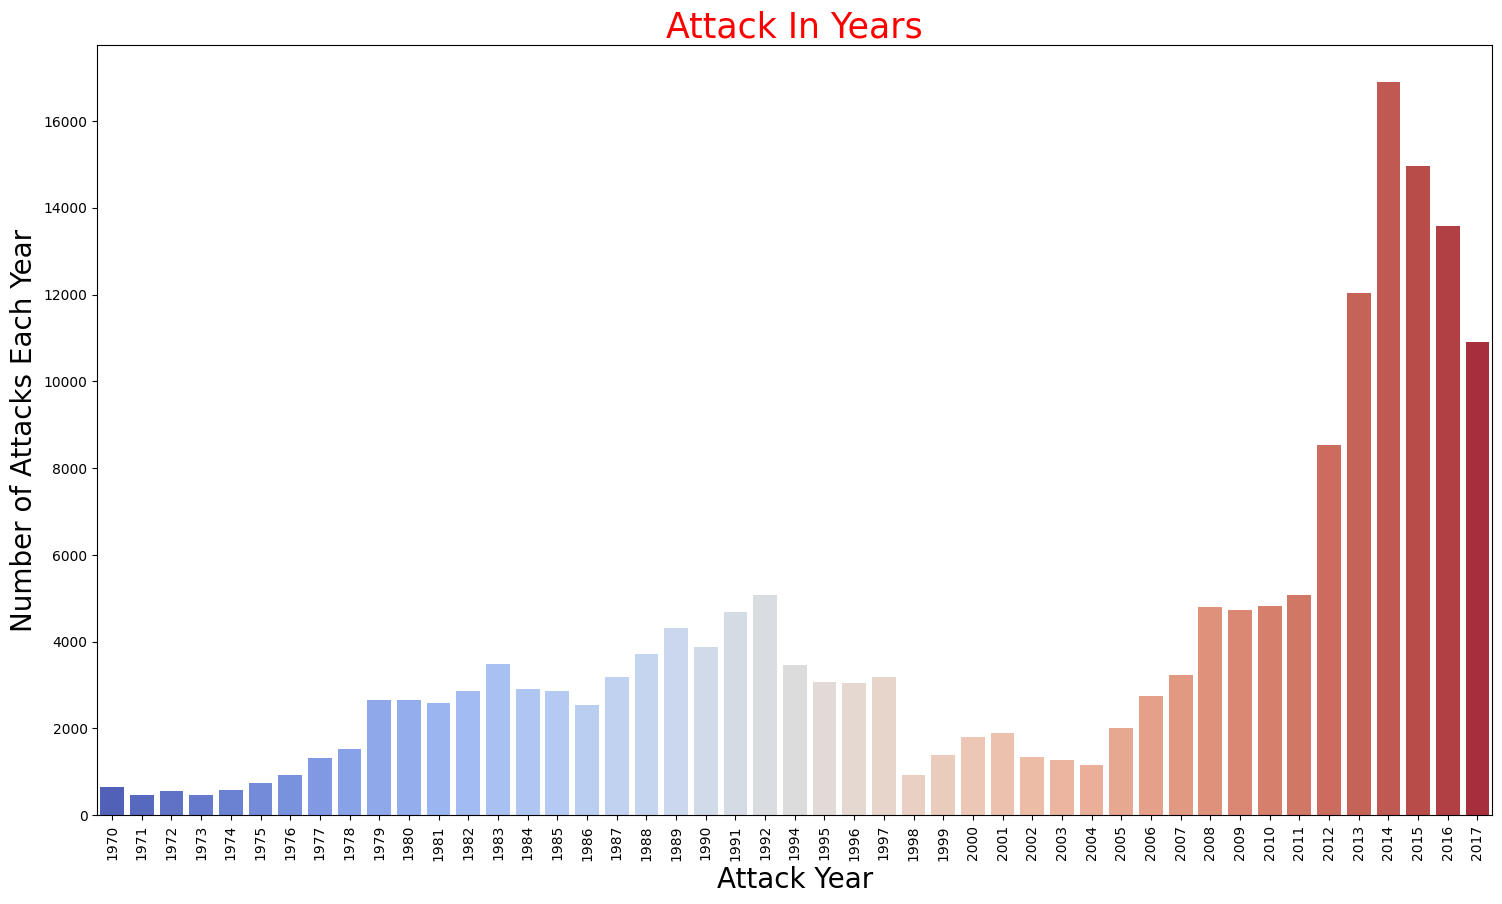

Year
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: count, dtype: int64

In [17]:
x_year = data['Year'].unique()
y_count_years = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'coolwarm')
plt.xticks(rotation = 90)
plt.xlabel('Attack Year', size = 20)
plt.ylabel('Number of Attacks Each Year', size = 20)
plt.title('Attack In Years', size = 25, color = 'r')
plt.show()

data.Year.value_counts()[:10]

The number of casualities between 1970-2017 is :
 935737.0


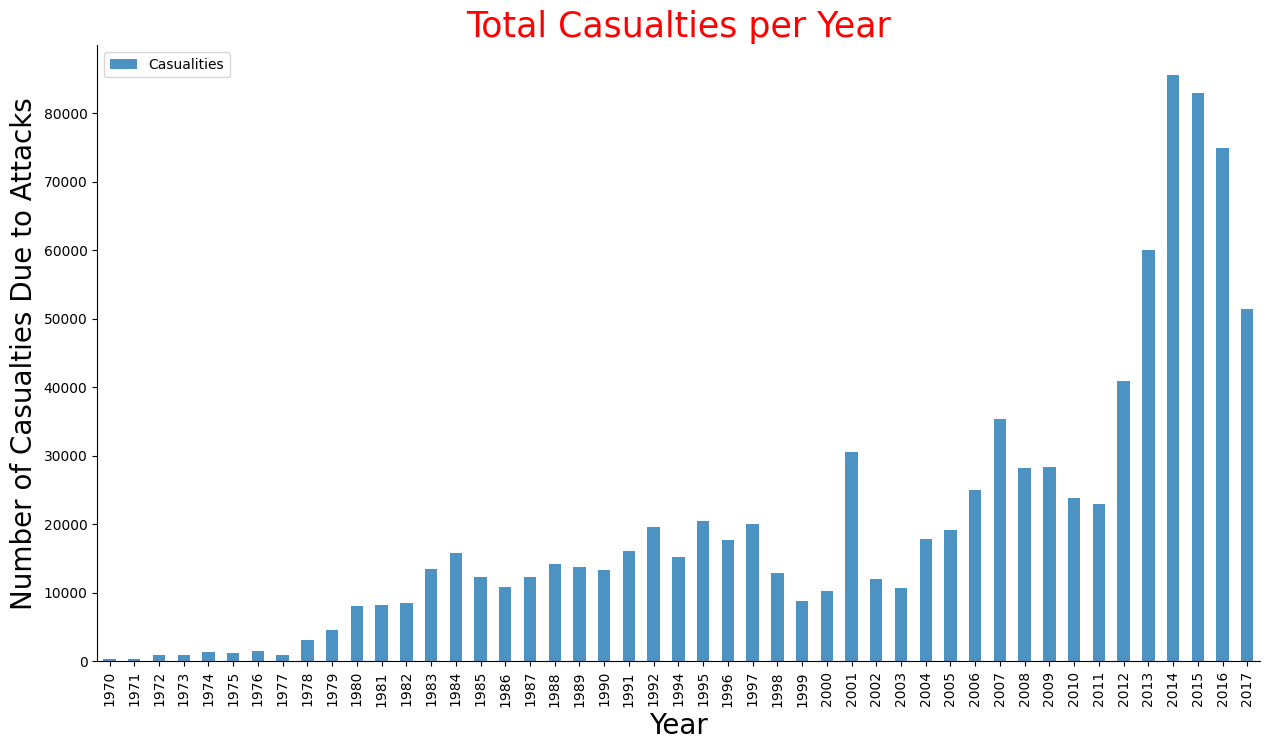

In [18]:
df = data[['Year','Casualities']].groupby('Year').sum()
fig, ax = plt.subplots(figsize=(15,8))
df.plot(kind='bar', alpha=0.8, ax=ax)
plt.xticks(rotation=90)
plt.xlabel('Year', size=20)
plt.ylabel('Number of Casualties Due to Attacks', size=20)
plt.title('Total Casualties per Year', size=25, color='r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

casualty=data.loc[:,'Casualities'].sum()
print("The number of casualities between 1970-2017 is :\n",casualty)

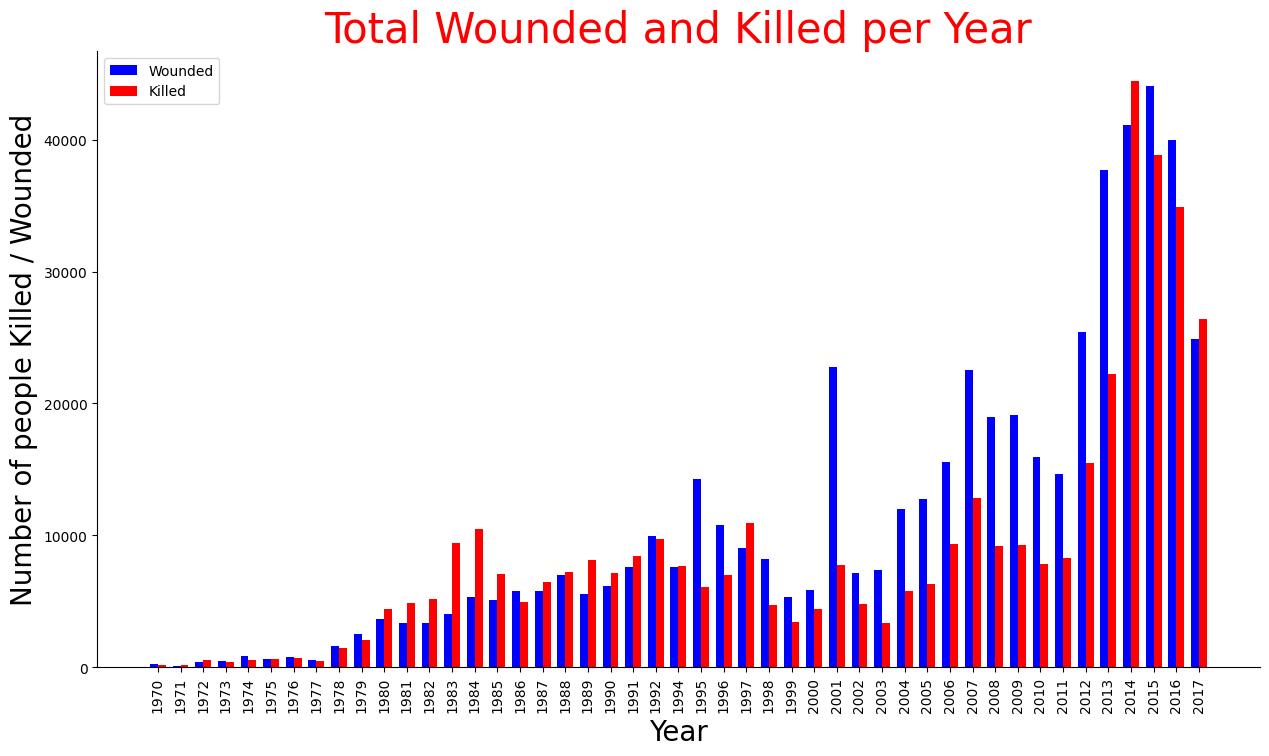

The number of people Wounded between 1970-2017 is :
 523869.0
The number of people killed between 1970-2017 is :
 411868.0


In [19]:
fig, ax = plt.subplots(figsize=(15, 8))

df_wounded = data[['Year', 'Wounded']].groupby('Year').sum()
df_killed = data[['Year', 'Killed']].groupby('Year').sum()

width = 0.35
x = np.arange(len(df_wounded))

rects1 = ax.bar(x - width/2, df_wounded['Wounded'], width, label='Wounded', color='blue')
rects2 = ax.bar(x + width/2, df_killed['Killed'], width, label='Killed' , color='red')

ax.set_xticks(x)
ax.set_xticklabels(df_wounded.index)
ax.set_xlabel('Year', size=20)
ax.set_ylabel('Number of people Killed / Wounded', size=20)
ax.set_title('Total Wounded and Killed per Year', size=30, color='r')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
plt.xticks(rotation=90)

plt.show()

wounded=data.loc[:,'Wounded'].sum()
print("The number of people Wounded between 1970-2017 is :\n",wounded)

killed=data.loc[:,'Killed'].sum()
print("The number of people killed between 1970-2017 is :\n",killed)

In [20]:
# Group the data by year and calculate the sum of killed and wounded
df_casualties = data[['Year', 'Killed', 'Wounded']].groupby('Year').sum()

# Sort the values in descending order based on the number of killed people and select the top 5 years
top_5_killed_years = df_casualties.nlargest(5, 'Killed')

# Sort the values in descending order based on the number of wounded people and select the top 5 years
top_5_wounded_years = df_casualties.nlargest(5, 'Wounded')

# Print the top 5 years with the highest number of people killed & wounded
print("1- Top 5 years with the highest number of people killed:")
print(top_5_killed_years)
print("\n2- Top 5 years with the highest number of people wounded:")
print(top_5_wounded_years)


1- Top 5 years with the highest number of people killed:
       Killed  Wounded
Year                  
2014  44490.0  41128.0
2015  38853.0  44043.0
2016  34871.0  40001.0
2017  26445.0  24927.0
2013  22273.0  37688.0

2- Top 5 years with the highest number of people wounded:
       Killed  Wounded
Year                  
2015  38853.0  44043.0
2014  44490.0  41128.0
2016  34871.0  40001.0
2013  22273.0  37688.0
2012  15497.0  25445.0


## Terrorist Activities By Region In Each Year

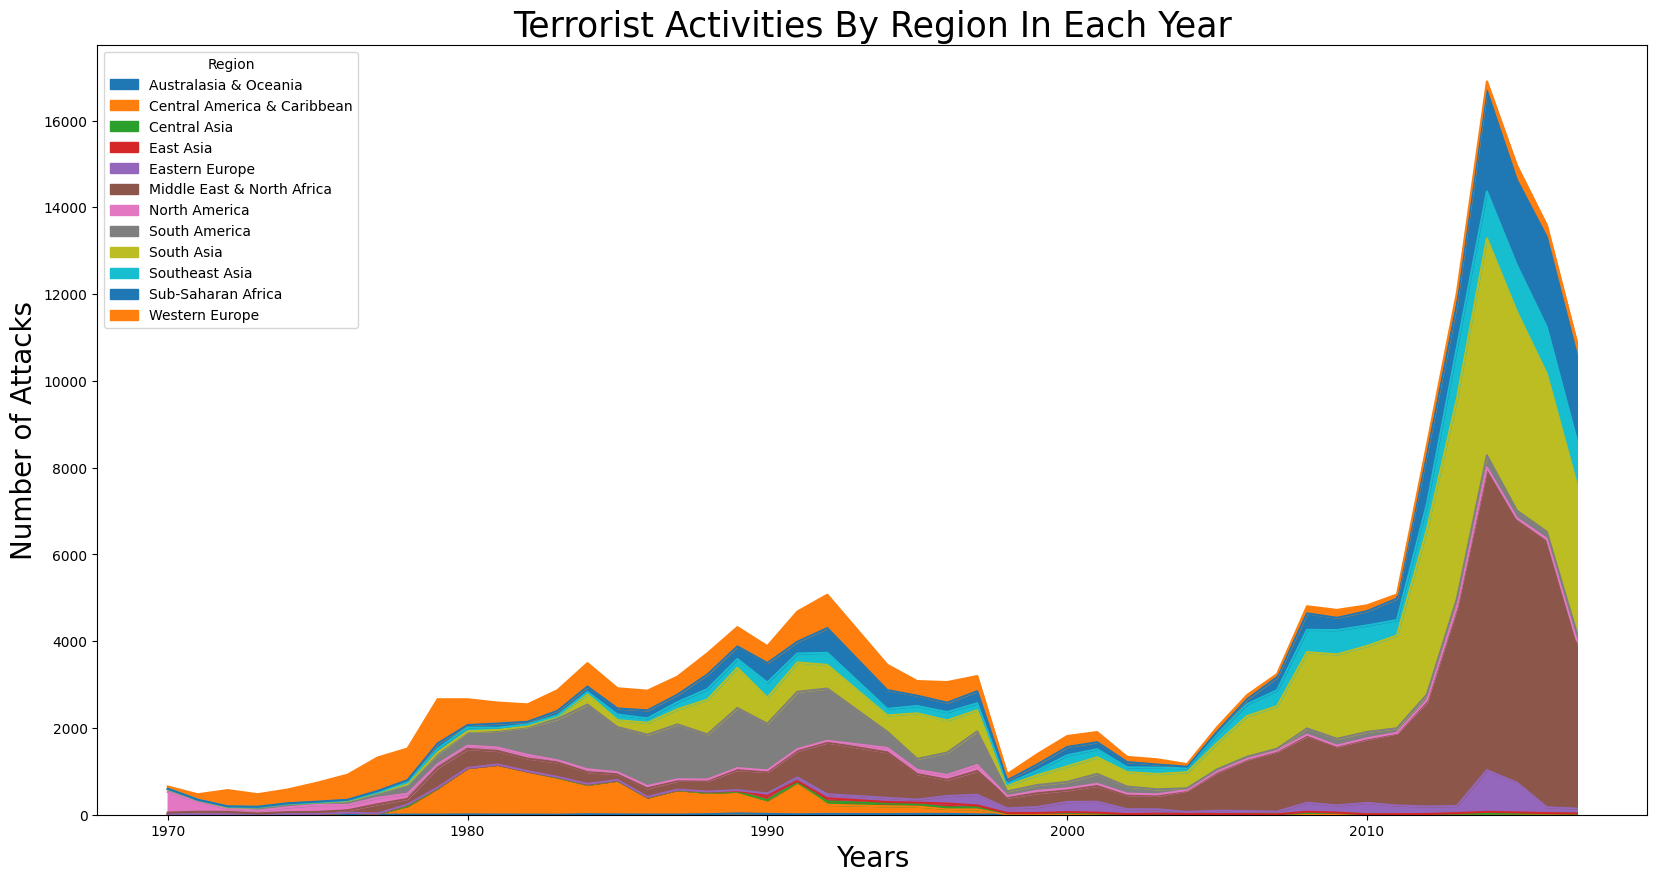

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64

In [21]:
data.groupby(['Year', 'Region']).size().unstack().plot(kind='area', stacked=True, figsize=(20, 10))
plt.title('Terrorist Activities By Region In Each Year', size='25')
plt.ylabel('Number of Attacks' , size='20')
plt.xlabel('Years', size='20')
plt.show()
data.Region.value_counts()

## Top 10 Countries Affected By Terrorist Attacks

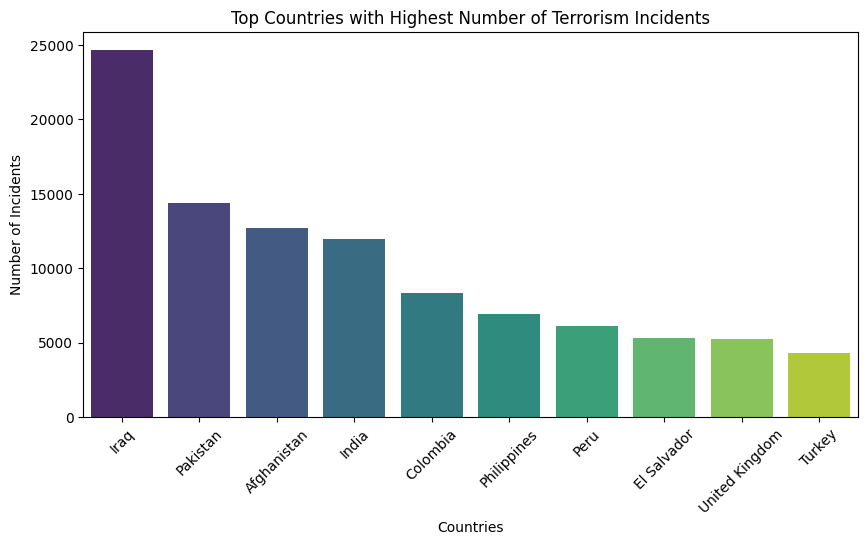

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

In [22]:
# Group the data by country and calculate the count of incidents
Country_counts = data['Country'].value_counts()

# Top countries with the highest counts
top_countries = Country_counts.nlargest(10)

# Generate a range of colors using Seaborn's color palette
colors = sns.color_palette('viridis', len(top_countries))

# Plot the bar chart of top countries
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette=colors)
plt.xlabel('Countries')
plt.ylabel('Number of Incidents')
plt.title('Top Countries with Highest Number of Terrorism Incidents')
plt.xticks(rotation=45)
plt.show()

# Printing the Countries which have highest number of terror activity:
data.Country.value_counts()[:10]

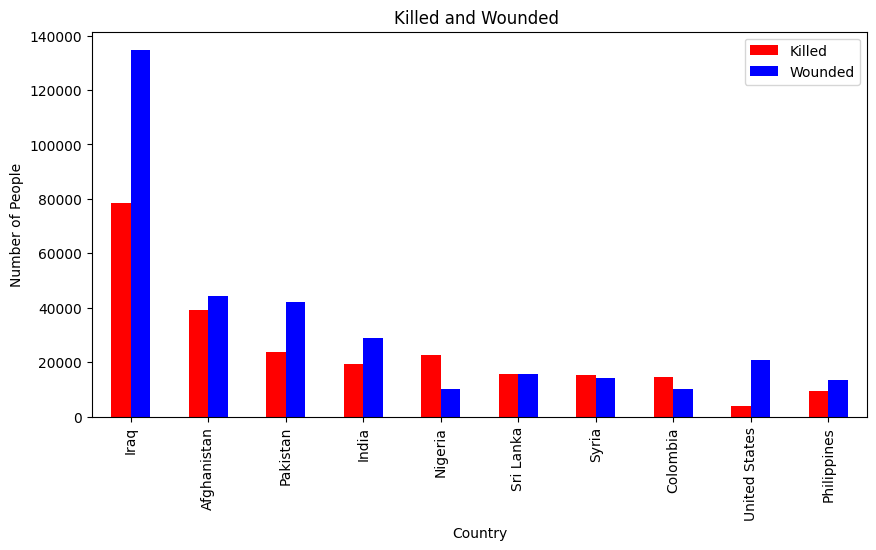

In [23]:
# Group the data by country and calculate the sum of killed and wounded
country_casualties = data.groupby('Country')[['Killed', 'Wounded']].sum()

# Select the top 10 countries with the highest total casualties
top_countries = country_casualties.sum(axis=1).nlargest(10)

# Filter the data for the top 10 countries
top_countries_data = country_casualties.loc[top_countries.index]

# Define the colors for killed and wounded bars
colors = ['red', 'blue']

# Plot the side-by-side bar chart
fig, ax = plt.subplots(figsize=(10,5))
top_countries_data.plot(kind='bar', ax=ax, color=colors)

# Set labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Number of People')
ax.set_title('Killed and Wounded ')

# Set legend
ax.legend(['Killed', 'Wounded'])

plt.xticks(rotation=90)
plt.show()

## Top 10 States Affected By Terrorist Attacks

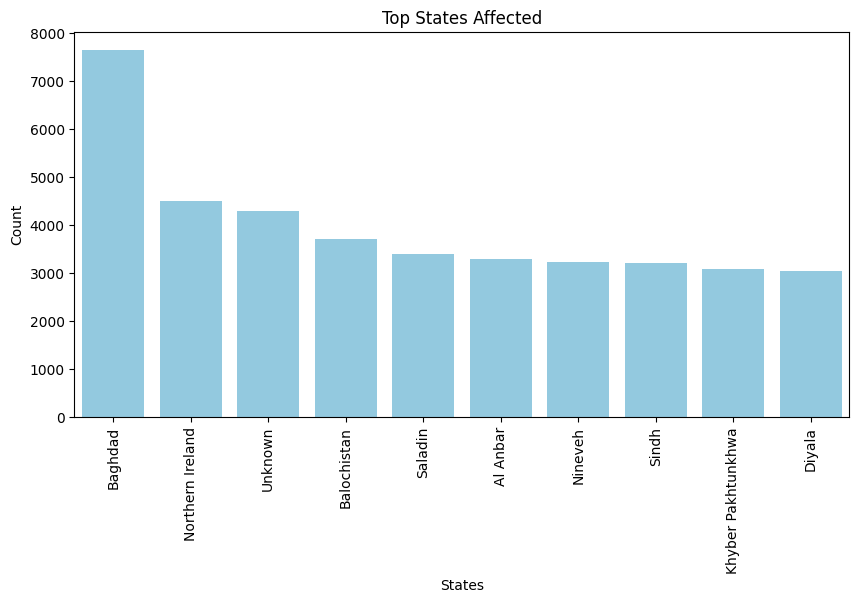

State
Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: count, dtype: int64

In [24]:
# Plot the bar chart of top states with shades of skyblue
plt.figure(figsize=(10, 5))
sns.barplot(x=data['State'].value_counts()[:10].index, y=data['State'].value_counts()[:10].values, color='skyblue')
plt.title('Top States Affected')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

# Printing the State which have highest number of terror activity:
data.State.value_counts()[:10]

State with the most terrorist activity: Baghdad - 7645

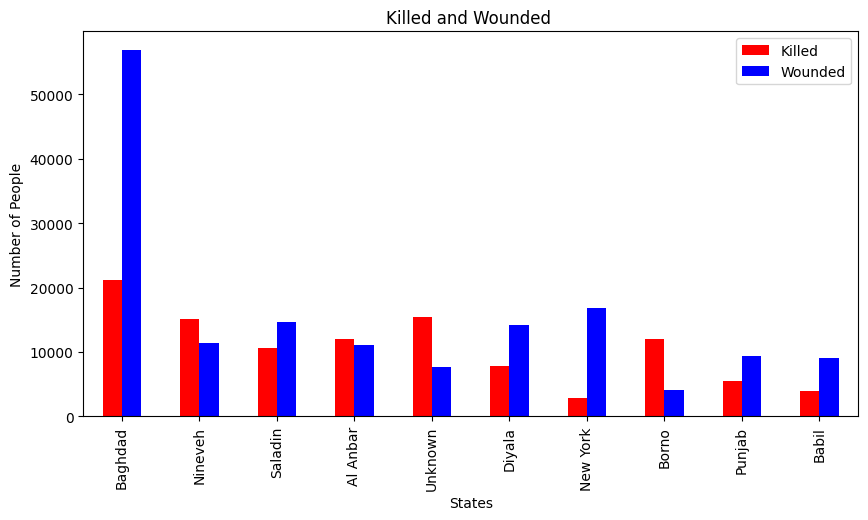

In [25]:
State_casualties = data.groupby('State')[['Killed', 'Wounded']].sum()
top_States = State_casualties.sum(axis=1).nlargest(10)
top_State_data = State_casualties.loc[top_States.index]
colors = ['red', 'blue']
fig, ax = plt.subplots(figsize=(10, 5))
top_State_data.plot(kind='bar', ax=ax , color=colors)
ax.set_xlabel('States')
ax.set_ylabel('Number of People')
ax.set_title('Killed and Wounded ')
ax.legend(['Killed', 'Wounded'])
plt.xticks(rotation=90)

plt.show()

## Top 10 Cities Affected By Terrorist Attacks

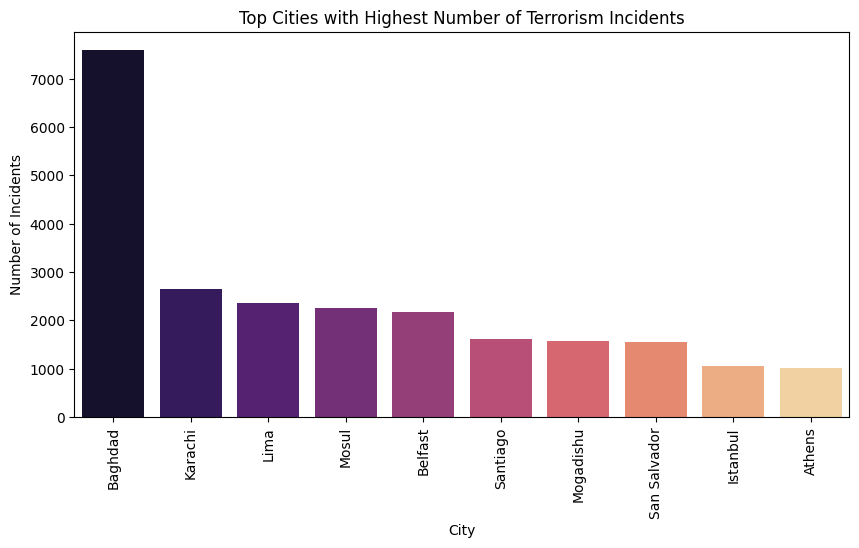

City
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: count, dtype: int64

In [26]:
city_counts = data['City'].value_counts().drop('Unknown')
top_cities = city_counts.nlargest(10)
colors = sns.color_palette('magma', len(top_cities))
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette=colors)
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.title('Top Cities with Highest Number of Terrorism Incidents')
plt.xticks(rotation=90)
plt.show()

# Printing the Cities which have highest number of terror activity:
data.City.value_counts()[1:10]

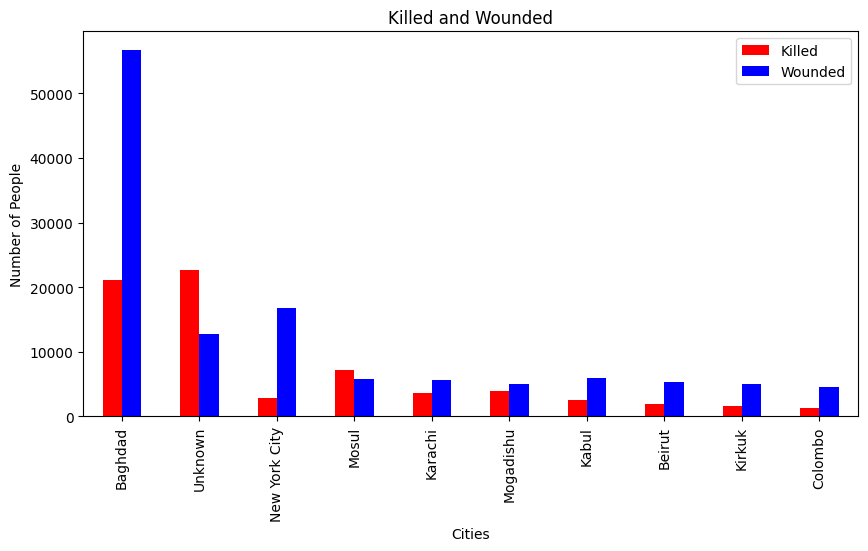

In [27]:
City_casualties = data.groupby('City')[['Killed', 'Wounded']].sum()
top_Cities = City_casualties.sum(axis=1).nlargest(10)
top_City_data = City_casualties.loc[top_Cities.index]
colors = ['red', 'blue']
fig, ax = plt.subplots(figsize=(10, 5))
top_City_data.plot(kind='bar', ax=ax , color=colors)
ax.set_xlabel('Cities')
ax.set_ylabel('Number of People')
ax.set_title('Killed and Wounded')
ax.legend(['Killed', 'Wounded'])
plt.xticks(rotation=90)

plt.show()

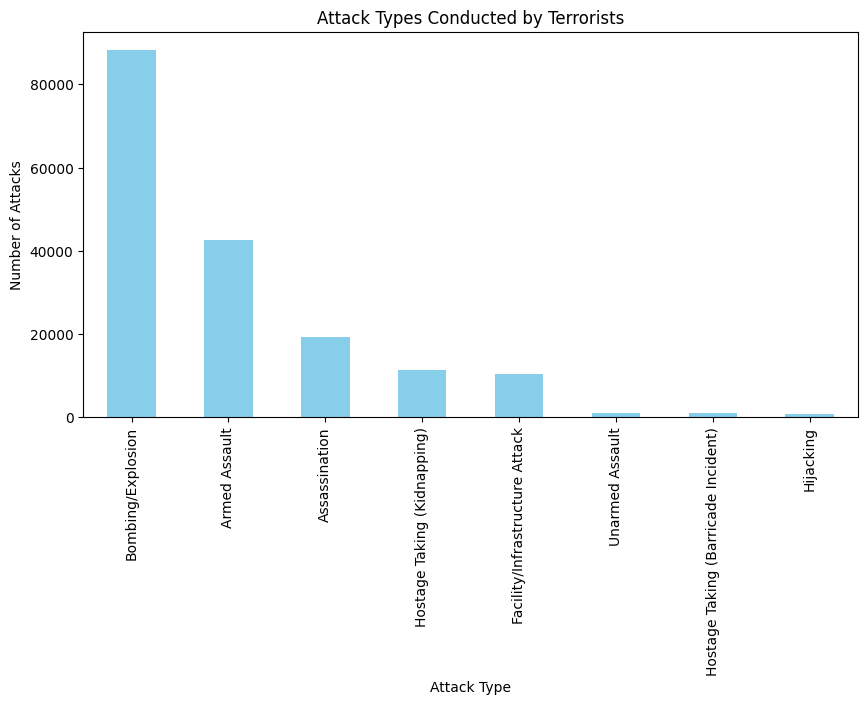

AttackType
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

In [28]:
# Filter the data for the attack types
top_attack_types = data['AttackType'].value_counts().nlargest(10).drop('Unknown')

# Plot the bar chart
plt.figure(figsize=(10, 5))
top_attack_types.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.title('Attack Types Conducted by Terrorists')

plt.xticks(rotation=90)
plt.show()

data.AttackType.value_counts()[:10]

In [29]:
attack_name = 'Bombing/Explosion'  
filtered_data = data[data['AttackType'] == attack_name]
total_killed = filtered_data['Killed'].sum()
total_wounded = filtered_data['Wounded'].sum()
total_casualties = total_killed + total_wounded

print("Total number of casualties:", total_casualties)
print("Total number of people wounded:", total_wounded)
print("Total number of people killed:", total_killed)


Total number of casualties: 530007.0
Total number of people wounded: 372686.0
Total number of people killed: 157321.0


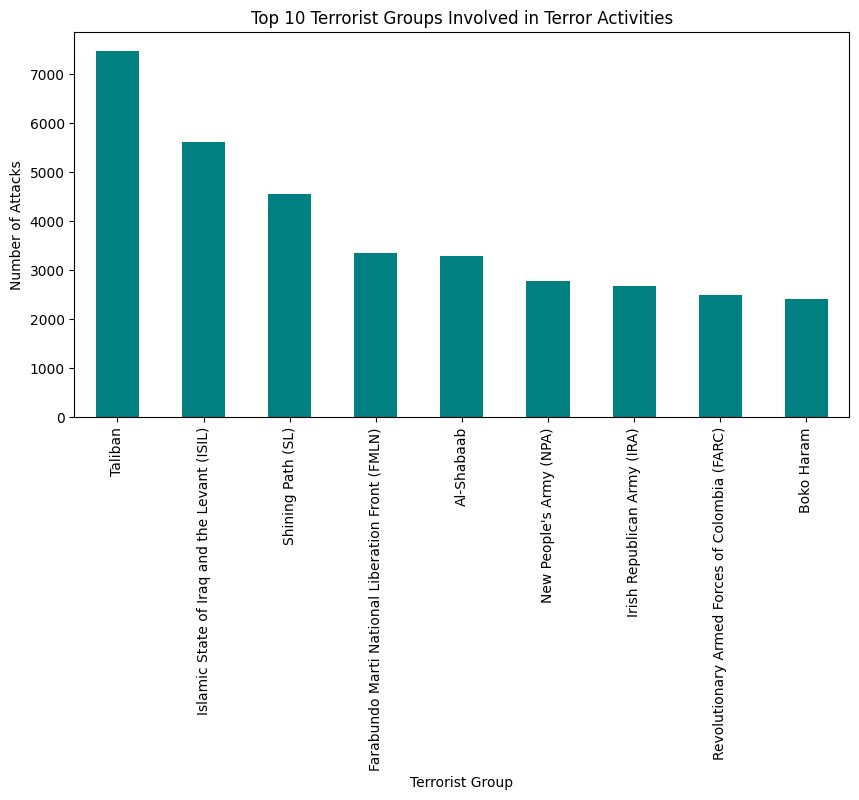

Group
Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: count, dtype: int64

In [30]:
top_terrorist_groups = data['Group'].value_counts().nlargest(10).drop('Unknown')
plt.figure(figsize=(10, 5))
top_terrorist_groups.plot(kind='bar', color='teal')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Terrorist Groups Involved in Terror Activities')
plt.xticks(rotation=90)

plt.show()

data.Group.value_counts()[1:10]

In [31]:
group_name = 'Taliban'
filtered_data = data[data['Group'] == group_name]
total_killed = filtered_data['Killed'].sum()
total_wounded = filtered_data['Wounded'].sum()
total_casualties = total_killed + total_wounded

print("Total number of casualties caused by", group_name, ":", total_casualties)
print("Total number of people wounded by", group_name, ":", total_wounded)
print("Total number of people killed by", group_name, ":", total_killed)


Total number of casualties caused by Taliban : 57342.0
Total number of people wounded by Taliban : 27932.0
Total number of people killed by Taliban : 29410.0


In [32]:
df = data[['Group', 'Country', 'Killed']]
df = df.groupby(['Group', 'Country'], axis=0).sum().sort_values('Killed',ascending=False).drop('Unknown').reset_index().head(5)
df

,Group,Country,Killed
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0


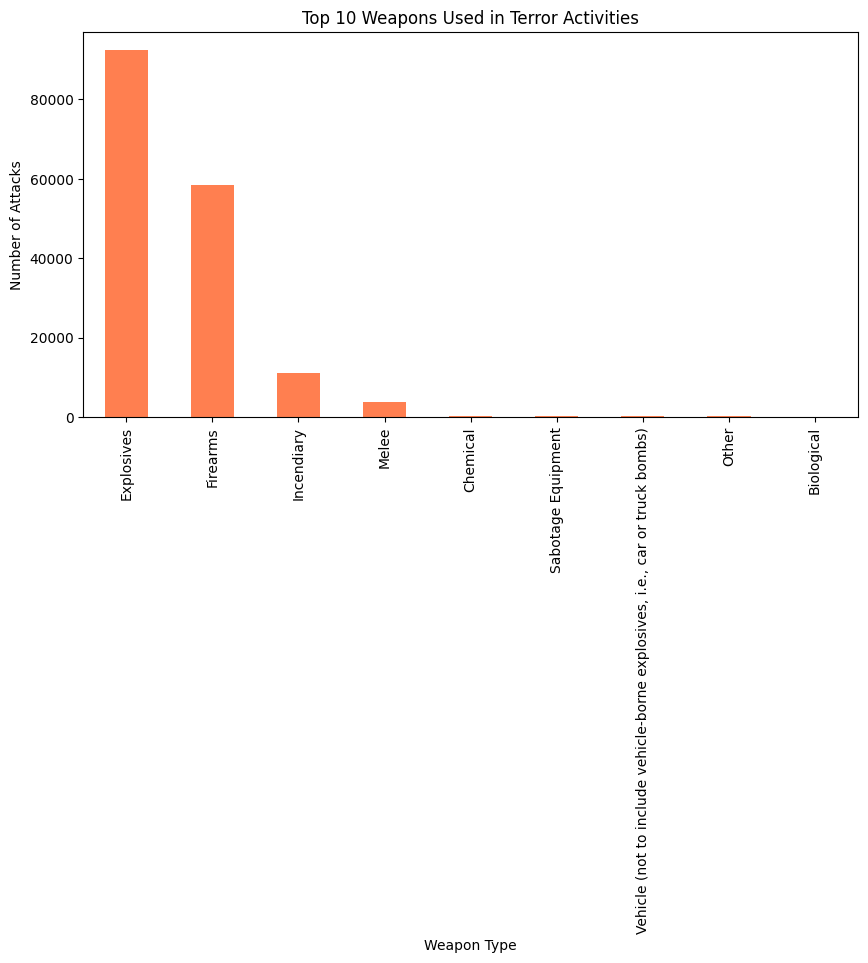

Weapon
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: count, dtype: int64

In [33]:
top_weapons = data['Weapon'].value_counts().nlargest(10).drop('Unknown')
plt.figure(figsize=(10, 5))
top_weapons.plot(kind='bar', color='coral')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Weapons Used in Terror Activities')
plt.xticks(rotation=90)

plt.show()

data.Weapon.value_counts()[:10]

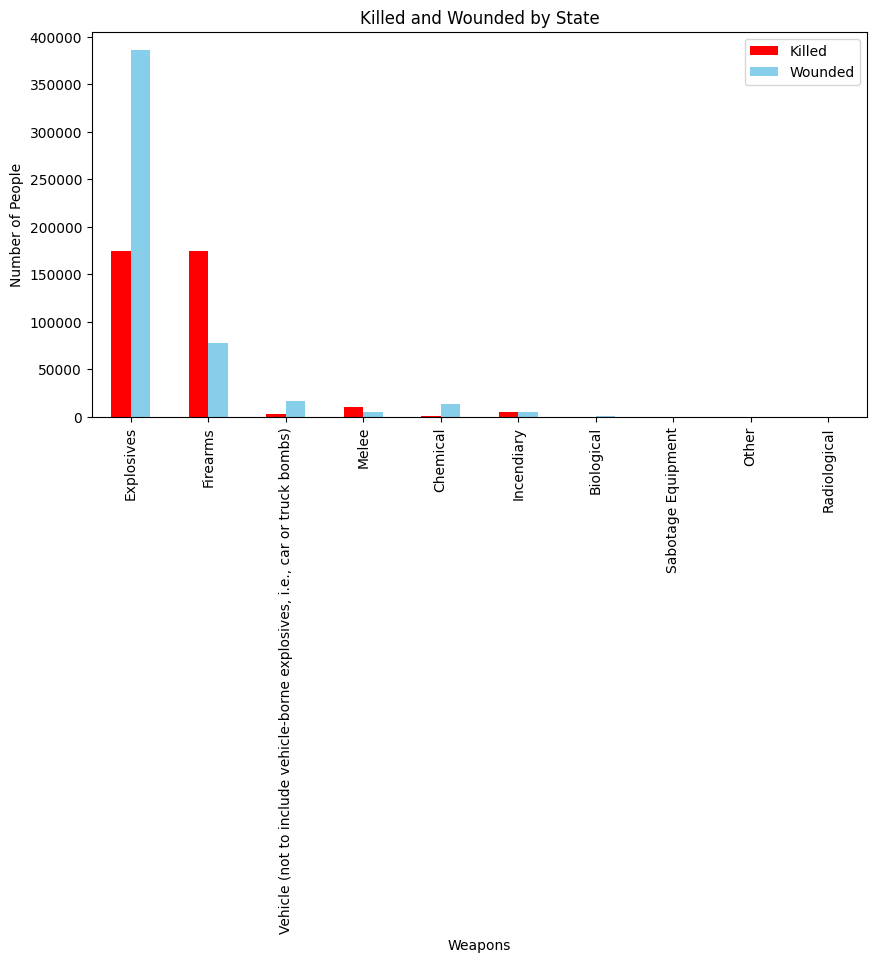

In [34]:
casualties = data.groupby('Weapon')[['Killed', 'Wounded']].sum().drop('Unknown')
top_weapons = casualties.sum(axis=1).nlargest(10)
top_data = casualties.loc[top_weapons.index]
colors = ['red', 'skyblue']
fig, ax = plt.subplots(figsize=(10, 5))
top_data.plot(kind='bar', ax=ax , color=colors)
ax.set_xlabel('Weapons')
ax.set_ylabel('Number of People')
ax.set_title('Killed and Wounded by State')
ax.legend(['Killed', 'Wounded'])
plt.xticks(rotation=90)
plt.show()

In [35]:
weapon_name = 'Explosives' 
filtered_data = data[data['Weapon'] == weapon_name]
total_killed = filtered_data['Killed'].sum()
total_wounded = filtered_data['Wounded'].sum()
total_casualties = filtered_data['Casualities'].sum()

print("Total number of people killed by", weapon_name, ":", total_killed)
print("Total number of people wounded by", weapon_name, ":", total_wounded)
print("Total number of casualties caused by", weapon_name, ":", total_casualties)


Total number of people killed by Explosives : 174277.0
Total number of people wounded by Explosives : 385904.0
Total number of casualties caused by Explosives : 560181.0


In [36]:
data.loc[:,'Casualities'].sum()

935737.0

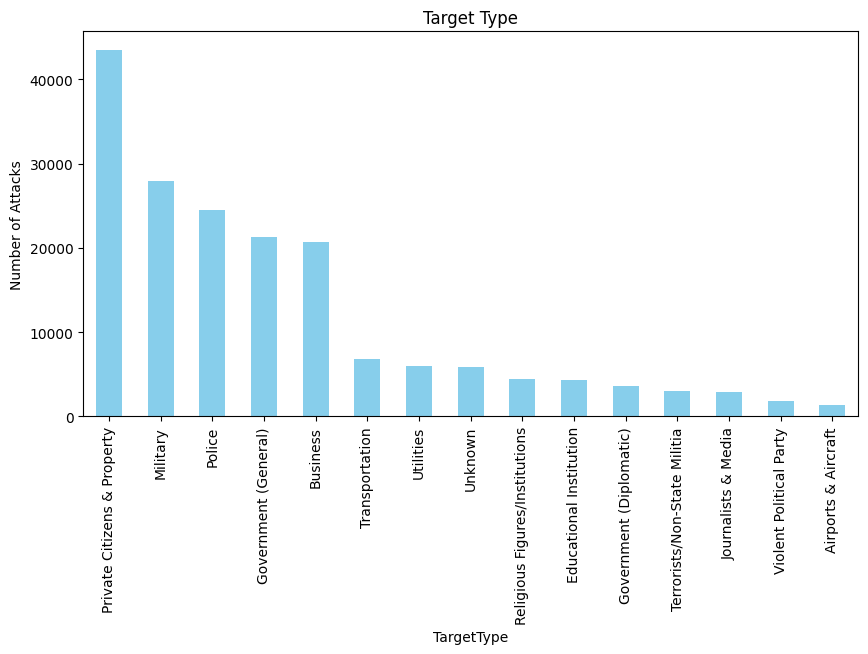

In [37]:
target = data['TargetType'].value_counts().nlargest(15)
plt.figure(figsize=(10, 5))
target.plot(kind='bar', color='skyblue')
plt.ylabel('Number of Attacks')
plt.title('Target Type')
plt.xticks(rotation=90)
plt.show()

In [38]:
data.TargetType.value_counts()[:10]

TargetType
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: count, dtype: int64

We can analyze from the data that Civilians are most affected due to terror attack


## Month with highest terror Attacks

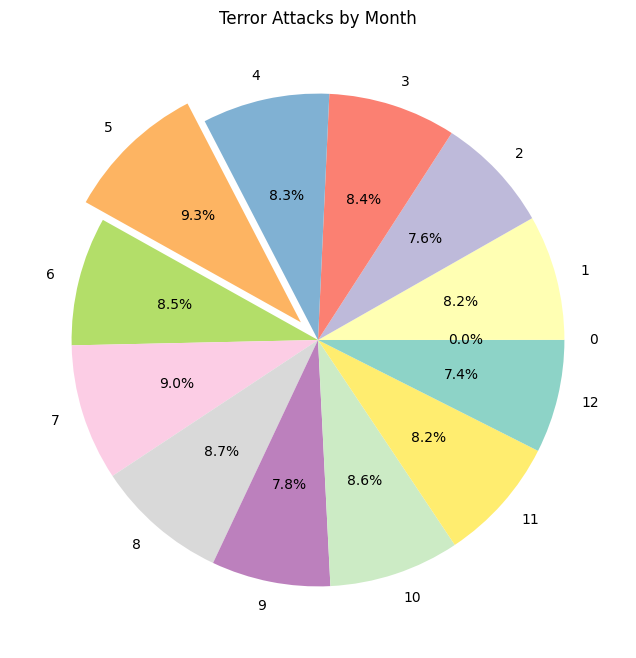

Month
5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
Name: count, dtype: int64

In [39]:
# Count the number of attacks in each month
monthly_attacks = data['Month'].value_counts().sort_index()

# Calculate the percentage of attacks for each month
percentages = monthly_attacks / monthly_attacks.sum() * 100

# Find the index of the slice with the highest percentage
max_index = percentages.idxmax()

# Create a pie chart
plt.figure(figsize=(8, 8))
explode = [0.1 if i == max_index else 0 for i in range(len(monthly_attacks))]
plt.pie(monthly_attacks, labels=monthly_attacks.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors,
         explode=explode)
plt.title('Terror Attacks by Month')
plt.show()

data.Month.value_counts()[:10]

The most attacks take place in the month of May and the least in November.

## After analyzing the data and performing various visualizations, we can draw the following conclusions:

1. Yearly Analysis:
The number of terrorist attacks has been increasing over the years, with a peak in - 
    
    2014 with 16903 Attacks
    1971 with  471 Attacks
    

2. Casualties Analysis:

The number of casualties (killed and wounded) due to terrorist attacks has shown a significant impact.

    Total Casualities - 935737
    Killed - 411868
    Wounded - 523869
    
3. Region wise Attack

The top 5 Regions with most Attacks are:

    Middle East & North Africa     50474
    South Asia                     44974
    South America                  18978
    Sub-Saharan Africa             17550
    Western Europe                 16639

4. Country Attacked

The top 5 countries with most Attacks are:

    Iraq              24636
    Pakistan          14368
    Afghanistan       12731
    India             11960
    Colombia           8306

5. City Attacked

The top 5 cities with most Attacks are:

    Baghdad         7589
    Karachi         2652
    Lima            2359
    Mosul           2265
    Belfast         2171
    
6. Attack Types:

The top 5 attack types conducted by terrorists include are:

    Bombing/Explosion                      88255
    Armed Assault                          42669
    Assassination                          19312
    Hostage Taking (Kidnapping)            11158
    Facility/Infrastructure Attack         10356

7. Terrorist Groups:

The top 5 terrorist groups involved in terrorist activities are:

    Taliban                                              7478
    Islamic State of Iraq and the Levant (ISIL)          5613
    Shining Path (SL)                                    4555
    Farabundo Marti National Liberation Front (FMLN)     3351
    Al-Shabaab                                           3288

8. Weapons Used:

The top weapons used in terror activities are 

    Explosives     92426
    Firearms       58524


9. Target Types:

The top 5 target types of terrorist attacks are

    Private Citizens & Property       43511
    Military                          27984
    Police                            24506
    Government (General)              21283
    Business                          20669

10. Month-wise Analysis:

The months with the highest number of terror attacks are 

    May      16875
    July     16268
    Aug      15800
    Oct      15563
    


These conclusions provide valuable insights into the trends, patterns, and areas of concern related to terrorist activities. They can assist in understanding the nature of terrorism and help in formulating strategies to counter and prevent such incidents in the future.